▶ **Task 2 : MOVIE RATING PREDICTION**
* Author: Sabeel Ahmad
* Domain: Data Science
* Aim: Build a model that predicts the rating of a movie based on features like genre, director, and actor

*IMPORTING LIBRARIES*

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

**Movie Data**

In [97]:
df = pd.read_csv('/content/drive/MyDrive/Codsoft/IMDb_Movies_India.csv', encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [98]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [99]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

**Data Visualization**

Text(0.5, 1.0, 'Number of Movies Per Year')

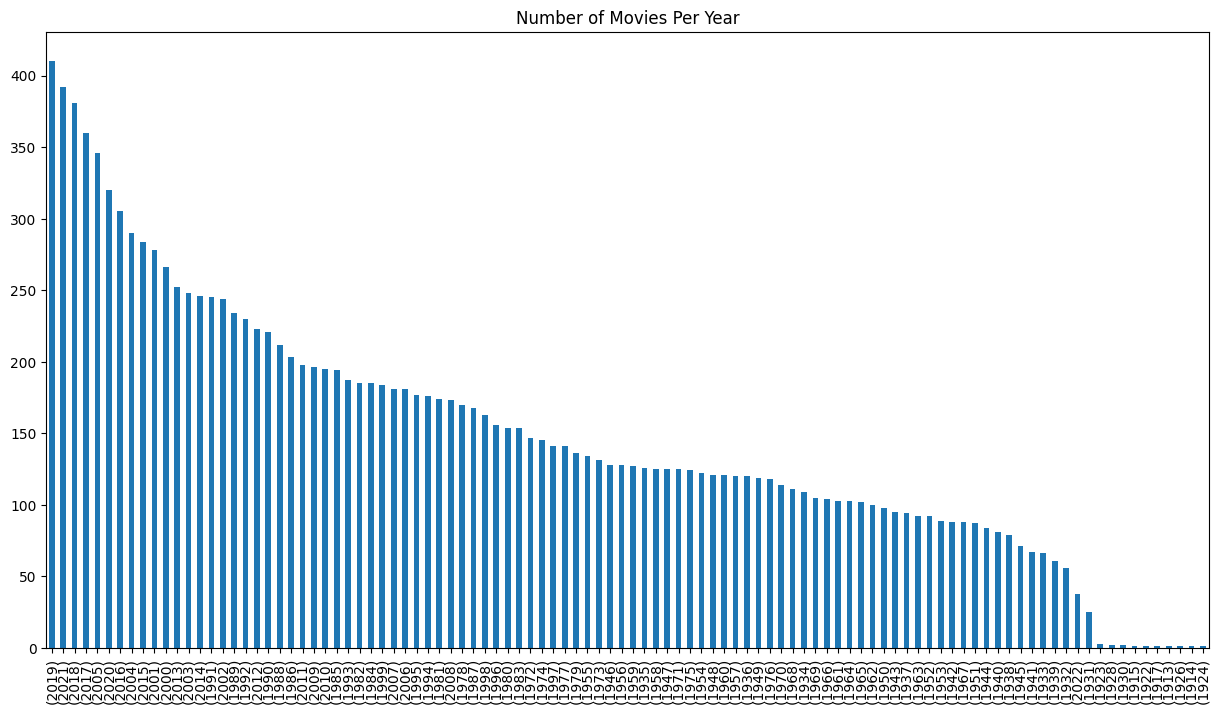

In [100]:
plt.figure(figsize=(15,8))
df['Year'].value_counts().plot(kind='bar')
plt.title('Number of Movies Per Year')

<Axes: >

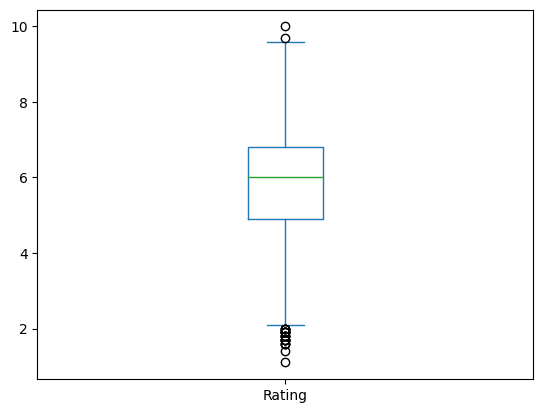

In [101]:
#Boxplot
df['Rating'].plot(kind='box')

***Data Preprocessing***

In [102]:
#deleting columns
df = df.drop(columns=['Name','Year' ,'Duration','Votes'])
df

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
0,Drama,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,"Drama, Musical",NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,Drama,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...
15504,Action,4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Action,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Action,NaN,NaN,NaN,NaN,NaN


checking which columns are object (strings or int)

In [103]:
column_data_types = df.dtypes
column_data_types

Genre        object
Rating      float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

filling Not known in the place of NaN values

In [104]:
df[['Genre', 'Director','Actor 1','Actor 2','Actor 3']] = df[['Genre', 'Director','Actor 1','Actor 2','Actor 3']].fillna('notknown')
df

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
0,Drama,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,"Drama, Musical",NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,Drama,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...
15504,Action,4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Action,NaN,Kiran Thej,Sangeeta Tiwari,notknown,notknown
15507,Action,NaN,notknown,notknown,notknown,notknown


Applying LabelEncoding which Converts categorical column into ordinal values (values that have a meaningful order)

In [105]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()
columns_to_encode = ['Genre','Director', 'Actor 1','Actor 2', 'Actor 3']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()


# Apply label encoding and dropp the original columns

for column in columns_to_encode:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    df = df.drop([column], axis=1)
df

,Rating,Genre_encoded,Director_encoded,Actor 1_encoded,Actor 2_encoded,Actor 3_encoded
0,NaN,299,1926,2250,800,3108
1,7.0,299,1548,3280,4790,527
2,NaN,351,5123,3713,2866,3450
3,4.4,228,3319,2917,1504,4020
4,NaN,299,385,3112,3462,405
...,...,...,...,...,...,...
15504,4.6,0,2690,2586,4299,4262
15505,4.5,40,2499,227,4532,519
15506,NaN,0,2424,3609,4891,4820
15507,NaN,0,5938,4718,4891,4820


using mean to fill NaN values in the Rating problem

In [106]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df

,Rating,Genre_encoded,Director_encoded,Actor 1_encoded,Actor 2_encoded,Actor 3_encoded
0,5.841621,299,1926,2250,800,3108
1,7.000000,299,1548,3280,4790,527
2,5.841621,351,5123,3713,2866,3450
3,4.400000,228,3319,2917,1504,4020
4,5.841621,299,385,3112,3462,405
...,...,...,...,...,...,...
15504,4.600000,0,2690,2586,4299,4262
15505,4.500000,40,2499,227,4532,519
15506,5.841621,0,2424,3609,4891,4820
15507,5.841621,0,5938,4718,4891,4820


In [107]:
df.isnull().sum()

Rating              0
Genre_encoded       0
Director_encoded    0
Actor 1_encoded     0
Actor 2_encoded     0
Actor 3_encoded     0
dtype: int64

In [108]:
df = df.drop_duplicates()
df

,Rating,Genre_encoded,Director_encoded,Actor 1_encoded,Actor 2_encoded,Actor 3_encoded
0,5.841621,299,1926,2250,800,3108
1,7.000000,299,1548,3280,4790,527
2,5.841621,351,5123,3713,2866,3450
3,4.400000,228,3319,2917,1504,4020
4,5.841621,299,385,3112,3462,405
...,...,...,...,...,...,...
15503,5.800000,29,4416,990,1596,3135
15504,4.600000,0,2690,2586,4299,4262
15505,4.500000,40,2499,227,4532,519
15506,5.841621,0,2424,3609,4891,4820


In [109]:
X = df.drop("Rating", axis = 1)
y = df["Rating"]
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (14749, 5)
Shape of y =  (14749,)


In [110]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (11799, 5)
Shape of y_train =  (11799,)
Shape of X_test =  (2950, 5)
Shape of y_test =  (2950,)


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error  # Import the mean_squared_error function

# Create a Random Forest classifier
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the mean squared error (MSE) as a regression metric
mse = mean_squared_error(y_test, y_pred)

# Print the MSE (you can use other regression metrics as needed)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.9223805494682767


**Machine learning model ---> LinearRegression**

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import svm

In [113]:
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

In [118]:
print("Kindly Input .\n")

inputs = {}

# Labels for categorical features
movie = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Loop over user input
for i in movie:
    input_user = input(f"Enter {i}: ")
    inputs[i] = float(input_user)  # Convert user input to float

# Convert user inputs into a 1D array
user_in_array = np.array(list(inputs.values())).reshape(1, -1)

# Use the trained model to make a prediction based on user input
user_rating_prediction = model.predict(user_in_array)

# Print the predicted rating
print(f"Predicted Movie Rating: {user_rating_prediction[0]:.1f}")

Kindly Input .

Enter Genre: 299
Enter Director: 1926
Enter Actor 1: 2250
Enter Actor 2: 800
Enter Actor 3: 3108
Predicted Movie Rating: 5.8


In [116]:
df

,Rating,Genre_encoded,Director_encoded,Actor 1_encoded,Actor 2_encoded,Actor 3_encoded
0,5.841621,299,1926,2250,800,3108
1,7.000000,299,1548,3280,4790,527
2,5.841621,351,5123,3713,2866,3450
3,4.400000,228,3319,2917,1504,4020
4,5.841621,299,385,3112,3462,405
...,...,...,...,...,...,...
15503,5.800000,29,4416,990,1596,3135
15504,4.600000,0,2690,2586,4299,4262
15505,4.500000,40,2499,227,4532,519
15506,5.841621,0,2424,3609,4891,4820
